# Описание датасета "S&P 500 Companies with Financial Information"

[![Kaggle](https://img.shields.io/badge/Kaggle-Dataset-blue.svg)](https://www.kaggle.com/datasets/paytonfisher/sp-500-companies-with-financial-information)

## Общая информация

- **Период данных**: Июль 2020 года
- **Количество компаний**: 505
- **Количество столбцов**: 14
- **Тип данных**: Финансовые показатели компаний S&P 500

## Структура данных

### Категориальные переменные (4)

| Столбец | Описание |
|---------|-----------|
| `Symbol` | Тикер компании на бирже (уникальный идентификатор) |
| `Name` | Полное официальное название компании |
| `Sector` | Экономический сектор деятельности компании |
| `SEC Filings` | Ссылки на отчетность в SEC (10-K, 10-Q) |

### Числовые переменные (10)

| Столбец | Описание | Метрика |
|---------|-----------|---------|
| `Price` | Цена одной акции | Абсолютная |
| `Price/Earnings`  | Коэффициент Цена/Прибыль | Относительная |
| `Dividend Yield` | Дивидендная доходность  | Относительная |
| `Earnings/Share`  | Прибыль на акцию  | Абсолютная |
| `52 Week Low` | Минимальная цена за 52 недели  | Абсолютная |
| `52 Week High` | Максимальная цена за 52 недели  | Абсолютная |
| `Market Cap` | Рыночная капитализация  | Абсолютная |
| `EBITDA` | Прибыль до вычетов  | Абсолютная |
| `Price/Sales`  | Коэффициент Цена/Выручка | Относительная |
| `Price/Book`  | Коэффициент Цена/Балансовая стоимость | Относительная |

## Распределение по секторам

Наиболее представленные сектора:
- **Consumer Discretionary**: 17%
- **Information Technology**: 14%
- **Остальные сектора**: 70%

## Пример строки данных

| Symbol | Name | Sector | Price | P/E | Dividend Yield | EPS | 52W Low | 52W High | Market Cap |
|--------|------|---------|-------|-----|----------------|-----|---------|----------|------------|
| MMM | 3M Company | Industrials | 222.89 | 24.31 | 2.33 | 9.17 | 142.00 | 239.00 | 128.4B |

## Ключевые финансовые метрики

### Мультипликаторы оценки
- **P/E (Price/Earnings)**: Оценка стоимости акции относительно прибыли
- **P/S (Price/Sales)**: Оценка относительно выручки
- **P/B (Price/Book)**: Оценка относительно балансовой стоимости

### Показатели доходности
- **Dividend Yield**: Доходность по дивидендам
- **EPS**: Прибыльность компании на акцию

### Рыночные показатели
- **Market Cap**: Размер компании
- **52 Week High/Low**: Волатильность акции

## Примечания

1. Данные актуальны на июль 2020 года
2. Некоторые показатели могут иметь отрицательные значения (убыточные компании)
3. Market Cap представлен в различных диапазонах (от миллиардов до триллионов)
4. Для полного анализа рекомендуется дополнить данные текущей информацией

### 🎯 Целевая переменная (Target Variable)

**Рекомендуемая целевая переменная:** `Market Cap` (Рыночная капитализация)

**Обоснование:**
- Рыночная капитализация является прямой оценкой стоимости компании рынком
- Рассчитывается как `Цена акции × Количество акций`
- Наиболее точно отражает реальную стоимость компании
- Широко используется в финансовом анализе для оценки компаний

### Признаки для модели (Features)

#### Основные финансовые показатели:
| Признак | Тип | Обоснование |
|---------|-----|-------------|
| `Price/Earnings` (P/E) | Числовой | Отражает оценку компании относительно прибыли |
| `Earnings/Share` (EPS) | Числовой | Показывает прибыльность на акцию |
| `EBITDA` | Числовой | Операционная прибыль до вычетов |
| `Price/Sales` (PS) | Числовой | Оценка относительно выручки |
| `Price/Book` (PB) | Числовой | Оценка относительно балансовой стоимости |
| `Dividend Yield` | Числовой | Доходность для инвесторов |

#### Рыночные показатели:
| Признак | Тип | Обоснование |
|---------|-----|-------------|
| `52 Week High` | Числовой | Максимальная оценка рынка |
| `52 Week Low` | Числовой | Минимальная оценка рынка |

#### Категориальные признаки:
| Признак | Тип | Преобразование |
|---------|-----|----------------|
| `Sector` | Категориальный | One-Hot Encoding |


In [44]:
%pip install ydata_profiling

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [45]:
%pip install phik
#!pip install phik

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
%matplotlib inline
# Импортируем необходимые библиотеки
import numpy as np  # Для математических операций и работы с массивами
import pandas as pd  # Для работы с табличными данными
import matplotlib.pyplot as plt  # Для построения графиков
import seaborn as sns  # Для визуализации данных (более красивые графики)
from ydata_profiling import ProfileReport  # Для автоматического анализа данных
from sklearn.linear_model import LinearRegression  # Модель линейной регрессии
from sklearn.preprocessing import StandardScaler  # Для стандартизации данных
from sklearn.model_selection import train_test_split  # Для разделения на train/test
from sklearn.linear_model import LogisticRegression  # Модель логистической регрессии
from sklearn.preprocessing import PolynomialFeatures  # Для создания полиномиальных признаков
from sklearn.metrics import mean_squared_error, root_mean_squared_error  # Метрики ошибок
from sklearn.metrics import r2_score  # Метрика качества R²
import phik  # Для расширенного анализа корреляций
from phik.report import plot_correlation_matrix  # Для визуализации матрицы корреляций
from sklearn.preprocessing import OneHotEncoder  # Для кодирования категориальных переменных
from sklearn.impute import SimpleImputer  # Для заполнения пропущенных значений
from sklearn.pipeline import make_pipeline  # Для создания пайплайнов обработки
from sklearn.model_selection import cross_validate, KFold  # Для кросс-валидации
from sklearn.preprocessing import RobustScaler  # ← теперь RobustScaler

In [2]:
# Загружаем датасет с данными
src_data = pd.read_csv('financials.csv', sep=',')

- 'Symbol'       : Тикер компании - уникальный идентификатор, не несет прогностической силы для модели
- 'Name'         : Название компании - текстовая информация, не используется в численных моделях
- 'SEC Filings'  : Ссылки на документы - неструктурированные данные, сложны для анализа
- 'Price'        : Цена акции - удаляем чтобы избежать data leakage, так как Market Cap = Price × Количество акций

In [3]:
# Оценим пропуски
empty_fields = src_data[(src_data['Price/Earnings'].isna() | src_data['Price/Book'].isna()) ]
empty_fields

Empty DataFrame
Columns: [Symbol, Name, Sector, Price, Price/Earnings, Dividend Yield, Earnings/Share, 52 Week Low, 52 Week High, Market Cap, EBITDA, Price/Sales, Price/Book, SEC Filings, Earnings, Sales, Book]
Index: []

In [4]:
# Предположим мы сделали парсер и достали недостающие значения парсером#
# Заполняем пропуски недостающими значениями по состоянию на июнь 2020 г
# данные реальные, взяты с сайта из https://companiesmarketcap.com/
def fillNan():
    fill_values = {
        'Price/Book': {
                'ARNC': 1.31,
                'FL': 1.27,
                'HCA': 57.7,
                'MRO': 0.43,
                'OXY': 0.72,
                'PEP': 14.6,
                'TDG': -5.73,
                'UNP': 6.97
        },
        'Price/Earnings': {
                'PRGO': 23.8,
                'TPR': -4.99
        }
    }   

    for column, symbols in fill_values.items():
        for symbol, value in symbols.items():
            src_data.loc[(src_data[column].isna()) & (src_data['Symbol'] == symbol), column] = value

fillNan()


In [5]:
# Подготовка данных
def prepare_data(src_data):
    data = src_data.copy()
    
    # Преобразование числовых колонок
    numeric_cols = ['Market Cap', 'EBITDA', 'Price/Earnings', 'Price/Sales', 'Price/Book', 'Price']
    for col in numeric_cols:
        if col in data.columns:
            data[col] = pd.to_numeric(data[col], errors='coerce')
    
    # Создание новых признаков
    if 'Price/Earnings' in data.columns:
        data['Earnings'] = data['Market Cap'] / data['Price/Earnings']
    if 'Price/Sales' in data.columns:
        data['Sales'] = data['Market Cap'] / data['Price/Sales']  
    if 'Price/Book' in data.columns:
        data['Book'] = data['Market Cap'] / data['Price/Book']
    
    # Удаление ненужных колонок
    columns_to_drop = ['Price/Earnings', 'Price/Sales', 'Price/Book', 'Price', 
                      'SEC Filings', 'Symbol', 'Name']
    data = data.drop(columns=[col for col in columns_to_drop if col in data.columns])

    return data

# Подготовка данных
df = prepare_data(src_data)


Общая информация:

- 505 компаний из S&P 500


In [7]:
# Выводим описание данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector          505 non-null    object 
 1   Dividend Yield  505 non-null    float64
 2   Earnings/Share  505 non-null    float64
 3   52 Week Low     505 non-null    float64
 4   52 Week High    505 non-null    float64
 5   Market Cap      505 non-null    float64
 6   EBITDA          505 non-null    float64
 7   Earnings        505 non-null    float64
 8   Sales           505 non-null    float64
 9   Book            505 non-null    float64
dtypes: float64(9), object(1)
memory usage: 39.6+ KB


In [8]:
# АНАЛИЗ ПЕРВЫХ СТРОК ДАННЫХ
df.head()

Sector  Dividend Yield  Earnings/Share  52 Week Low  \
0             Industrials        2.332862            7.92       259.77   
1             Industrials        1.147959            1.70        68.39   
2             Health Care        1.908982            0.26        64.60   
3             Health Care        2.499560            3.29       125.86   
4  Information Technology        1.714470            5.44       162.60   

   52 Week High    Market Cap        EBITDA      Earnings         Sales  \
0       175.490  1.387211e+11  9.048000e+09  5.706337e+09  3.159738e+10   
1        48.925  1.078342e+10  6.010000e+08  3.884517e+08  3.015934e+09   
2        42.280  1.021210e+11  5.744000e+09  4.536697e+09  2.730158e+10   
3        60.050  1.813863e+11  1.031000e+10  9.344995e+09  2.883006e+10   
4       114.820  9.876586e+10  5.643228e+09  3.877733e+09  3.792681e+10   

           Book  
0  1.223290e+10  
1  1.698176e+09  
2  3.201287e+10  
3  6.939034e+09  
4  9.299986e+09

PRICE/EARNINGS (P/E) RATIO:
- Среднее: 24.81 (типичное значение для рынка)
- Стандартное отклонение: 41.24 (высокая волатильность)
- Минимум: -251.53 (убыточные компании)
- Максимум: 520.15 (сильно переоцененные компании или выбросы)
- Медиана: 19.45 (более репрезентативна чем среднее)

Есть экстремальные выбросы, требуется обработка

DIVIDEND YIELD:
- Среднее: 1.90% (типичная дивидендная доходность)
- Максимум: 12.66% (компании с высокими дивидендами)
- 25% компаний: <0.79% (низкие дивиденды)
- 75% компаний: >2.78% (высокие дивиденды)

Нормальное распределение, мало выбросов

EARNINGS/SHARE (EPS):
- Среднее: 3.75 (средняя прибыль на акцию)
- Минимум: -28.01 (убыточные компании)
- Максимум: 44.09 (высокоприбыльные компании)
- Медиана: 2.89 (более репрезентативна)

Есть убыточные компании, распределение асимметрично

52 WEEK HIGH/LOW:
- Диапазон цен: 2.80 - 1589.00 (огромный разброс)
- Средний максимум: 83.54, Средний минимум: 122.62

Отражает разные ценовые уровни акций

MARKET CAP (Целевая переменная):
- Среднее: 49.2 млрд $
- Медиана: 21.4 млрд $ (распределение скошено вправо)
- Минимум: 2.6 млрд $ (мелкие компании)
- Максимум: 809.5 млрд $ (гиганты как Apple, Microsoft)

Сильно скошенное распределение, требуется логарифмирование

EBITDA:
- Среднее: 3.59 млрд $
- Минимум: -5.07 млрд $ (убыточные компании)
- Максимум: 79.39 млрд $ (высокоприбыльные компании)

Есть компании с отрицательной EBITDA

PRICE/SALES (P/S) и PRICE/BOOK (P/B):
- P/S: в среднем 3.94, максимум 20.09
- P/B: в среднем 14.45, но медиана всего 3.40 (сильные выбросы!)
- P/B максимум: 1403.38 - выброс

P/B имеет экстремальные выбросы, требует особой обработки

In [9]:
df.describe()

Dividend Yield  Earnings/Share  52 Week Low  52 Week High  \
count      505.000000      505.000000   505.000000    505.000000   
mean         1.895953        3.753743   122.623832     83.536616   
std          1.537214        5.689036   155.362140    105.725473   
min          0.000000      -28.010000     6.590000      2.800000   
25%          0.794834        1.490000    56.250000     38.430000   
50%          1.769255        2.890000    86.680000     62.850000   
75%          2.781114        5.140000   140.130000     96.660000   
max         12.661196       44.090000  2067.990000   1589.000000   

         Market Cap        EBITDA      Earnings         Sales          Book  
count  5.050000e+02  5.050000e+02  5.050000e+02  5.050000e+02  5.050000e+02  
mean   4.923944e+10  4.141724e+09  2.391442e+09  2.021712e+10  1.508396e+10  
std    9.005017e+10  7.688696e+09  4.201764e+09  3.580574e+10  2.914188e+10  
min    2.626102e+09 -5.067000e+09 -2.855150e+09  5.619922e+08 -2.659896e+09  
25%    1.273207e+10  1.019784e+09  5.749338e+08  3.941049e+09  3.164694e+09  
50%    2.140095e+10  1.858000e+09  1.040747e+09  8.096598e+09  6.397664e+09  
75%    4.511968e+10  4.191000e+09  2.291166e+09  1.797425e+10  1.312089e+10  
max    8.095080e+11  8.038600e+10  4.801353e+10  3.711121e+11  2.592566e+11

In [6]:
# СОЗДАНИЕ ДЕТАЛЬНОГО ОТЧЕТА ПО ДАННЫМ С ПОМОЩЬЮ YDATA_PROFILING
profile = ProfileReport(df, title="Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:00<00:00, 129.17it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
# Отберем числовые признаки
numerical_data = df.select_dtypes(include=['float64'])

In [8]:
# Еще раз рассчитаем матрицу корреляции
correlation_matrix = numerical_data.corr()

<Axes: >

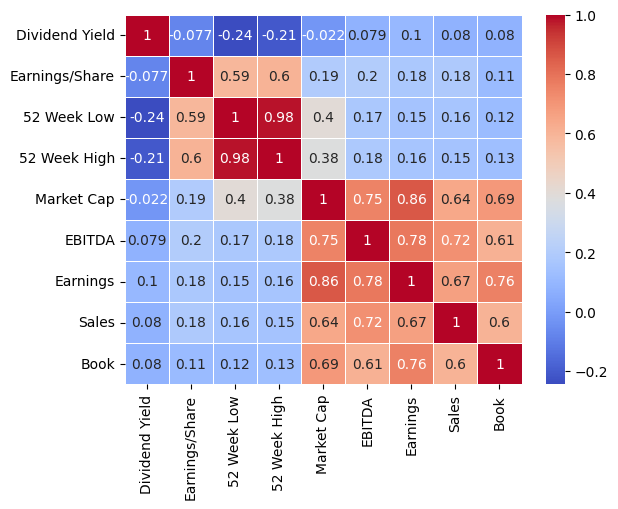

In [9]:
# Вывод матрицы корреляции
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

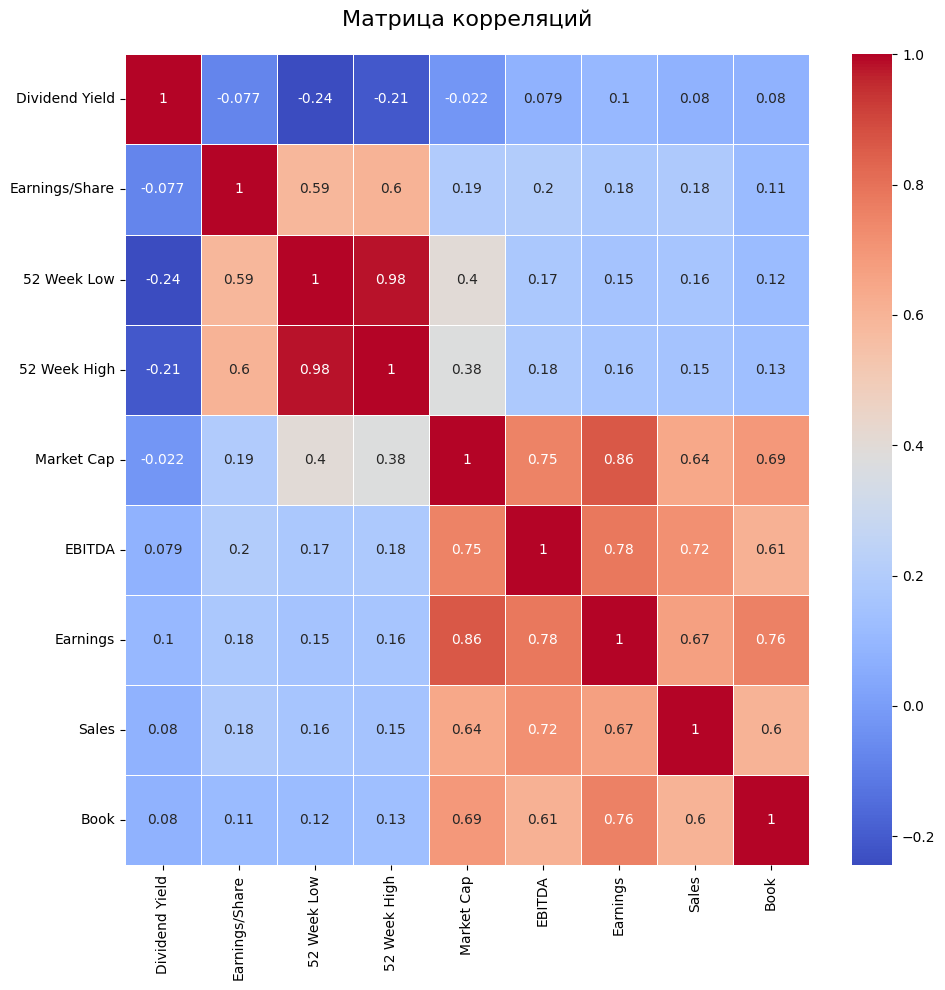

In [10]:
plt.figure(figsize=(10, 10))  # Ширина x Высота в дюймах
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Матрица корреляций', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

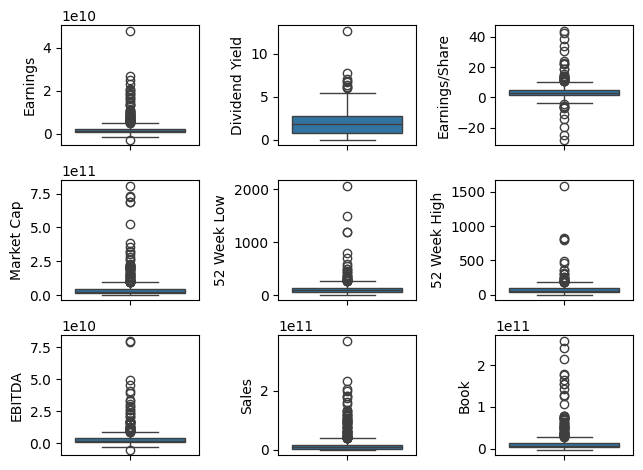

In [11]:
# Построим boxplot - графики зависимости целевой переменной от каждого признака

fig,axs=plt.subplots(ncols=3, nrows=3)

sns.boxplot(y='Earnings', data=df, legend=False, ax=axs[0, 0])
plt.ylabel('Earnings')

sns.boxplot(y='Dividend Yield', data=df, legend=False, ax=axs[0, 1])
plt.ylabel('Dividend Yield')

sns.boxplot(y='Earnings/Share', data=df, legend=False, ax=axs[0, 2])
plt.ylabel('Earnings/Share')

sns.boxplot(y='Market Cap', data=df, legend=False, ax=axs[1, 0])
plt.ylabel('Market Cap')

sns.boxplot(y='52 Week Low', data=df, legend=False, ax=axs[1, 1])
plt.ylabel('52 Week Low')

sns.boxplot(y='52 Week High', data=df, legend=False, ax=axs[1, 2])
plt.ylabel('52 Week High')

sns.boxplot(y='EBITDA', data=df, legend=False, ax=axs[2, 0])
plt.ylabel('EBITDA')

sns.boxplot(y='Sales', data=df, legend=False, ax=axs[2, 1])
plt.ylabel('Sales')

sns.boxplot(y='Book', data=df, legend=False, ax=axs[2, 2])
plt.ylabel('Book')

plt.tight_layout()  # Чтобы избежать наложения графиков
plt.show()

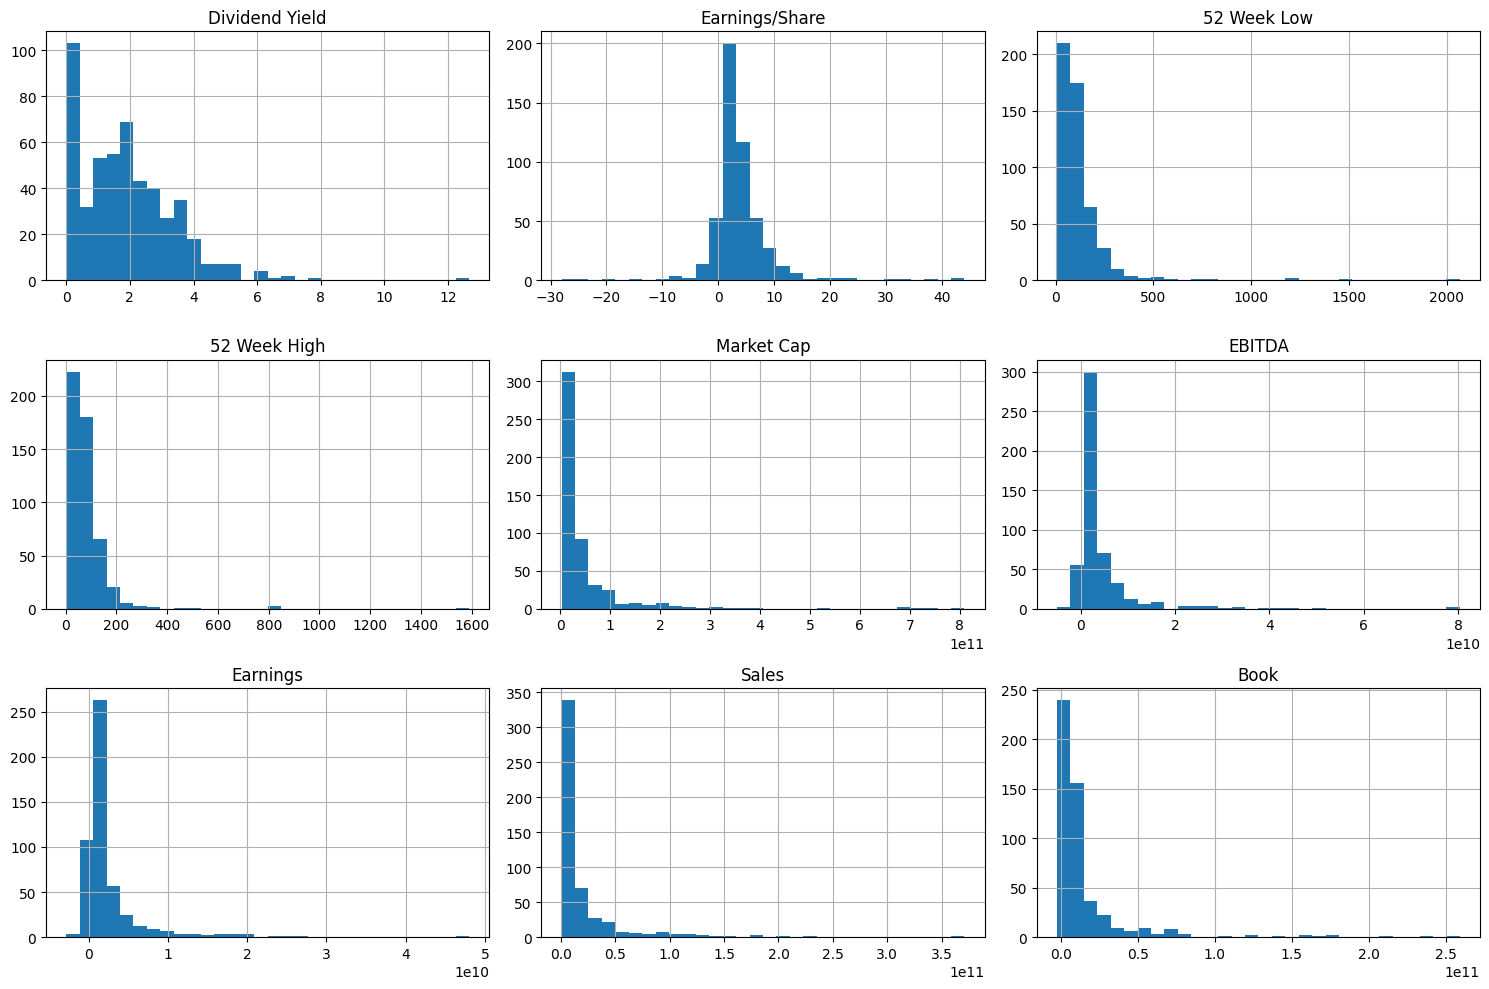

In [12]:
# Гистограммы распределений признакоу
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

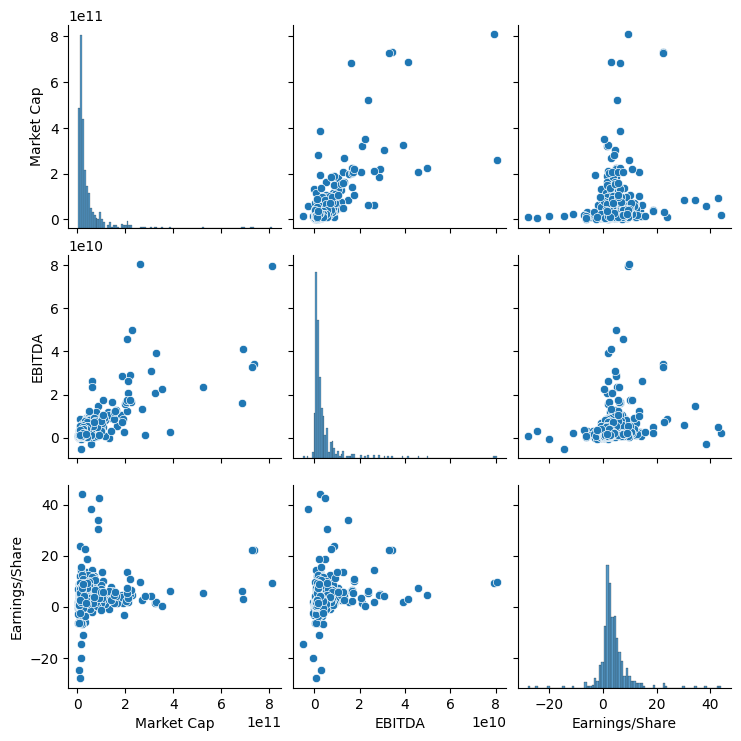

In [13]:
sns.pairplot(df[['Market Cap', 'EBITDA', 'Earnings/Share']])
plt.show()

ЗАМЕНА LABEL ENCODING НА ONE-HOT ENCODING ДЛЯ СТОЛБЦА SECTOR

In [14]:
# ЗАМЕНА LABEL ENCODING НА ONE-HOT ENCODING ДЛЯ СТОЛБЦА SECTOR
print("\n" + "="*50)
print("ПРИМЕНЕНИЕ ONE-HOT ENCODING К СТОЛБЦУ SECTOR (С drop_first=True)")

# Применяем one-hot encoding с drop_first для избежания мультиколлинеарности
df_encoded = pd.get_dummies(
    df,
    columns=['Sector'],
    prefix='Sector',
    drop_first=True,
    dtype=int  # <-- гарантирует, что столбцы будут int, а не bool или object
)

print("Столбцы после one-hot encoding:")
print(df_encoded.columns.tolist())

# Целевая переменная
y = df_encoded['Market Cap']

# Признаки (все остальные столбцы, кроме целевой)
X = df_encoded.drop('Market Cap', axis=1)



ПРИМЕНЕНИЕ ONE-HOT ENCODING К СТОЛБЦУ SECTOR (С drop_first=True)
Столбцы после one-hot encoding:
['Dividend Yield', 'Earnings/Share', '52 Week Low', '52 Week High', 'Market Cap', 'EBITDA', 'Earnings', 'Sales', 'Book', 'Sector_Consumer Staples', 'Sector_Energy', 'Sector_Financials', 'Sector_Health Care', 'Sector_Industrials', 'Sector_Information Technology', 'Sector_Materials', 'Sector_Real Estate', 'Sector_Telecommunication Services', 'Sector_Utilities']


In [20]:
X

Dividend Yield  Earnings/Share  52 Week Low  52 Week High        EBITDA  \
0          2.332862            7.92       259.77       175.490  9.048000e+09   
1          1.147959            1.70        68.39        48.925  6.010000e+08   
2          1.908982            0.26        64.60        42.280  5.744000e+09   
3          2.499560            3.29       125.86        60.050  1.031000e+10   
4          1.714470            5.44       162.60       114.820  5.643228e+09   
..              ...             ...          ...           ...           ...   
500        1.170079            1.83        76.81        46.860  7.220000e+08   
501        1.797080            4.07        86.93        62.850  2.289000e+09   
502        0.794834            9.01       133.49       108.170  2.007400e+09   
503        1.480933            2.60        55.61        38.430  0.000000e+00   
504        0.682372            1.65        80.13        52.000  1.734000e+09   

     Earnings      Sales       Book  Sector_Consumer Staples  Sector_Energy  \
0    9.168655  50.769079  19.655203                        0              0   
1    2.170029  16.848075   9.486614                        0              0   
2    2.499778  15.043522  17.639498                        0              0   
3    5.588872  17.242116   4.149962                        0              0   
4    5.909305  57.796942  14.172316                        0              0   
..        ...        ...        ...                      ...            ...   
500  2.270200  25.764712  13.227872                        0              0   
501  2.800000  12.084953   0.359770                        0              0   
502  8.067737  36.503577  48.338912                        0              0   
503  2.860124  13.363800  35.711268                        0              0   
504  2.180183   7.705075   3.953013                        0              0   

     Sector_Financials  Sector_Health Care  Sector_Industrials  \
0                    0                   0                   1   
1                    0                   0                   1   
2                    0                   1                   0   
3                    0                   1                   0   
4                    0                   0                   0   
..                 ...                 ...                 ...   
500                  0                   0                   1   
501                  0                   0                   0   
502                  0                   1                   0   
503                  1                   0                   0   
504                  0                   1                   0   

     Sector_Information Technology  Sector_Materials  Sector_Real Estate  \
0                                0                 0                   0   
1                                0                 0                   0   
2                                0                 0                   0   
3                                0                 0                   0   
4                                1                 0                   0   
..                             ...               ...                 ...   
500                              0                 0                   0   
501                              0                 0                   0   
502                              0                 0                   0   
503                              0                 0                   0   
504                              0                 0                   0   

     Sector_Telecommunication Services  Sector_Utilities  
0                                    0                 0  
1                                    0                 0  
2                                    0                 0  
3                                    0                 0  
4                                    0                 0  
..                                 

In [21]:
y

0      1.387211e+11
1      1.078342e+10
2      1.021210e+11
3      1.813863e+11
4      9.876586e+10
           ...     
500    1.291502e+10
501    2.700330e+10
502    2.445470e+10
503    1.067068e+10
504    3.599111e+10
Name: Market Cap, Length: 505, dtype: float64

ВЫЧИСЛЕНИЕ И ВИЗУАЛИЗАЦИЯ МАТРИЦЫ КОРРЕЛЯЦИЙ С ИСПОЛЬЗОВАНИЕМ PHIK

interval columns not set, guessing: ['Dividend Yield', 'Earnings/Share', '52 Week Low', '52 Week High', 'Market Cap', 'EBITDA', 'Earnings', 'Sales', 'Book', 'Sector_Consumer Staples', 'Sector_Energy', 'Sector_Financials', 'Sector_Health Care', 'Sector_Industrials', 'Sector_Information Technology', 'Sector_Materials', 'Sector_Real Estate', 'Sector_Telecommunication Services', 'Sector_Utilities']


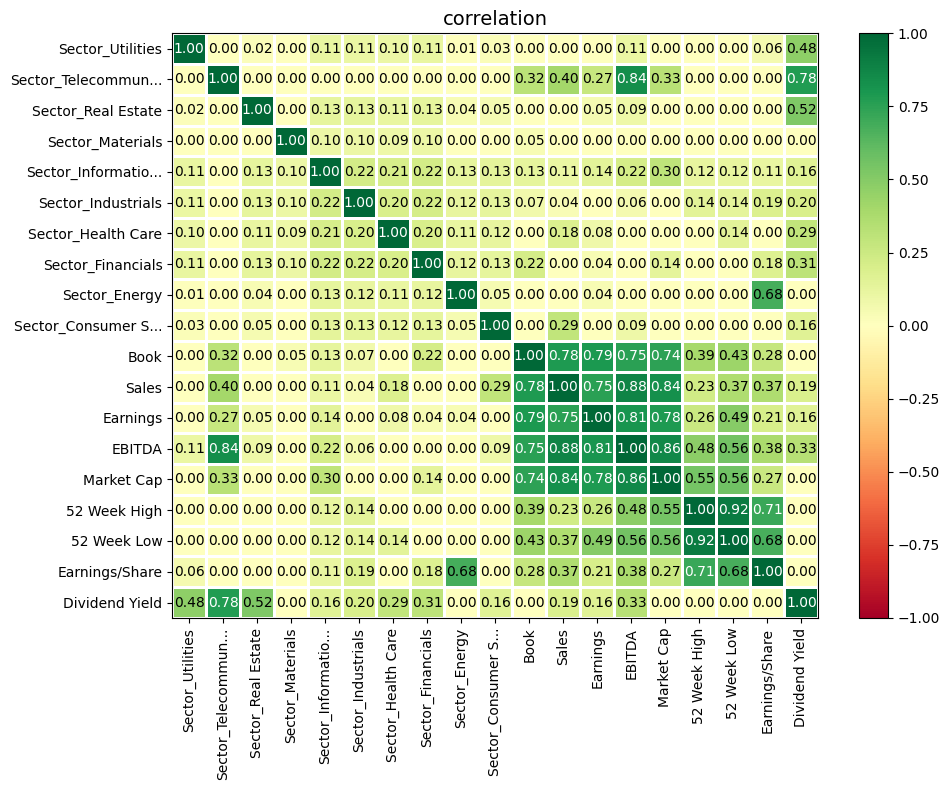

In [15]:
# Вычисляем матрицу корреляций Phi-K
corr_matrix = df_encoded.phik_matrix()
plot_correlation_matrix(corr_matrix.values, x_labels=corr_matrix.columns, y_labels=corr_matrix.index, figsize=(10, 8))

Для начала создадим обычную модель без полиномиальных признаков, чтобы сравнивать качество с ней.

РАЗДЕЛЕНИЕ ДАННЫХ НА ОБУЧАЮЩУЮ И ТЕСТОВУЮ ВЫБОРКИ

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [113]:
X_train

Dividend Yield  Earnings/Share  52 Week Low  52 Week High        EBITDA  \
182        1.352004            2.36       67.540     51.960000  7.216430e+08   
155        1.966102            4.54      126.650     83.230000  1.507000e+09   
280        0.262683            3.38       72.170     43.647053  1.405319e+09   
126        2.049254           -0.65       61.315     42.265000  5.328000e+09   
448        0.609113            3.16       89.920     50.960000  1.097534e+09   
..              ...             ...          ...           ...           ...   
106        0.000000            0.80      499.000    263.000000  4.012930e+08   
270        2.891845            0.01       22.750     16.560000  5.981000e+09   
348        5.443620            1.66       61.360     47.140000  1.851783e+09   
435        0.138145            1.14       62.190     45.000000  1.454000e+09   
102        0.768787            1.61       56.250     37.160000  4.693977e+08   

         Earnings         Sales          Book  Sector_Consumer Staples  \
182  4.370815e+08  5.040671e+09  1.989311e+09                        0   
155  7.982606e+08  5.032074e+09  2.123101e+09                        1   
280  9.521803e+08  1.274471e+10  8.304527e+09                        0   
126  8.978810e+08  3.153627e+10  3.031595e+10                        0   
448  6.071548e+08  4.942439e+09  2.388881e+09                        0   
..            ...           ...           ...                      ...   
106  1.675814e+08  3.011020e+09  1.257821e+09                        0   
270  1.540196e+09  1.367337e+10  3.608665e+10                        0   
348  6.467198e+08  8.405519e+09  5.456197e+09                        0   
435  6.893209e+08  1.432943e+10  5.935670e+09                        0   
102  2.339041e+09  8.774034e+09  1.546567e+10                        0   

     Sector_Energy  Sector_Financials  Sector_Health Care  Sector_Industrials  \
182              0                  0                   0                   1   
155              0                  0                   0                   0   
280              0                  0                   0                   0   
126              1                  0                   0                   0   
448              0                  0                   0                   0   
..             ...                ...                 ...                 ...   
106              0                  0                   0                   0   
270              1                  0                   0                   0   
348              1                  0                   0                   0   
435              0                  0                   0                   1   
102              0                  1                   0                   0   

     Sector_Information Technology  Sector_Materials  Sector_Real Estate  \
182                              0                 0                   0   
155                              0                 0                   0   
280                              0                 0                   0   
126                              0                 0                   0   
448                              1                 0                   0   
..                             ...               ...                 ...   
106                              0                 0                   0   
270                              0                 0                   0   
348                              0                 0                   0   
435                              0                 0                   0   
102                              0                 0                   0   

     Sector_Telecommunication Services  Sector_Utilities  
182                                  0                 0  
155                                  0                 0  
280                                  0                 0  
126                              

In [65]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 378 entries, 182 to 102
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Dividend Yield                     378 non-null    float64
 1   Earnings/Share                     378 non-null    float64
 2   52 Week Low                        378 non-null    float64
 3   52 Week High                       378 non-null    float64
 4   EBITDA                             378 non-null    float64
 5   Earnings                           378 non-null    float64
 6   Sales                              378 non-null    float64
 7   Book                               378 non-null    float64
 8   Sector_Consumer Staples            378 non-null    int64  
 9   Sector_Energy                      378 non-null    int64  
 10  Sector_Financials                  378 non-null    int64  
 11  Sector_Health Care                 378 non-null    int64  
 1

# **Базовая модель лин. рег.**

**Пайплайн**

Создаем пайплайн и обучаем, выполняем кросс-валидацию. 

In [18]:
# Создаем пайплайн
pipeline = make_pipeline(SimpleImputer(strategy='median'), StandardScaler(), LinearRegression())

# Обучаем пайплайн
pipeline.fit(X_train, y_train)

# Создаем KFold
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Выполняем кросс-валидацию
cv_metrics = cross_validate(
    estimator=pipeline,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring='r2',
    return_train_score=True,
    n_jobs=-1
)

Посмотреть на результат всех преобразованйи можно так:

Берем срез `[:-1]`, чтобы исключить последний шаг пайплайна, который  является моделью (LinearRegression).

In [68]:
X_train_transformed = pipeline[:-1].transform(X_train)
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=X_train.columns)
X_train_transformed_df

Dividend Yield  Earnings/Share  52 Week Low  52 Week High    EBITDA  \
0         -0.331338       -0.277548    -0.365591     -0.302169 -0.471788   
1          0.052538        0.105738     0.012758     -0.020673 -0.364649   
2         -1.012279       -0.098212    -0.335956     -0.377003 -0.378520   
3          0.104517       -0.806763    -0.405436     -0.389445  0.156613   
4         -0.795723       -0.136892    -0.222342     -0.311171 -0.420509   
..              ...             ...          ...           ...       ...   
373       -1.176483       -0.551825     2.396081      1.597639 -0.515490   
374        0.631225       -0.690722    -0.652282     -0.620844  0.245695   
375        2.226353       -0.400621    -0.405148     -0.345559 -0.317614   
376       -1.090128       -0.492047    -0.399835     -0.364824 -0.371879   
377       -0.695910       -0.409412    -0.437856     -0.435400 -0.506199   

     Earnings     Sales      Book  Sector_Consumer Staples  Sector_Energy  \
0   -0.468125 -0.455273 -0.439065                -0.266123      -0.254536   
1   -0.387093 -0.455539 -0.434801                 3.757659      -0.254536   
2   -0.352561 -0.217447 -0.237838                -0.266123      -0.254536   
3   -0.364743  0.362654  0.463529                -0.266123       3.928713   
4   -0.429968 -0.458306 -0.426333                -0.266123      -0.254536   
..        ...       ...       ...                      ...            ...   
373 -0.528588 -0.517929 -0.462373                -0.266123      -0.254536   
374 -0.220638 -0.188779  0.647405                -0.266123       3.928713   
375 -0.421092 -0.351400 -0.328597                -0.266123       3.928713   
376 -0.411534 -0.168527 -0.313319                -0.266123      -0.254536   
377 -0.041415 -0.340023 -0.009657                -0.266123      -0.254536   

     Sector_Financials  Sector_Health Care  Sector_Industrials  \
0            -0.381385           -0.381385            2.591194   
1            -0.381385           -0.381385           -0.385922   
2            -0.381385           -0.381385           -0.385922   
3            -0.381385           -0.381385           -0.385922   
4            -0.381385           -0.381385           -0.385922   
..                 ...                 ...                 ...   
373          -0.381385           -0.381385           -0.385922   
374          -0.381385           -0.381385           -0.385922   
375          -0.381385           -0.381385           -0.385922   
376          -0.381385           -0.381385            2.591194   
377           2.622022           -0.381385           -0.385922   

     Sector_Information Technology  Sector_Materials  Sector_Real Estate  \
0                        -0.417029         -0.217006           -0.260378   
1                        -0.417029         -0.217006           -0.260378   
2                        -0.417029         -0.217006           -0.260378   
3                        -0.417029         -0.217006           -0.260378   
4                         2.397916         -0.217006           -0.260378   
..                             ...               ...                 ...   
373                      -0.417029         -0.217006           -0.260378   
374                      -0.417029         -0.217006           -0.260378   
375                      -0.417029         -0.217006           -0.260378   
376                      -0.417029         -0.217006           -0.260378   
377                      -0.417029         -0.217006           -0.260378   

     Sector_Telecommunication Services  Sector_Utilities  
0                            -0.089443          -0.23636  
1                            -0.089443          -0.23636  
2                            -0.089443          -0.23636  
3                            -0.089443          -0.23636  
4                            -0.089443          -0.23636  
..                                 ...               ...  
373                          -0.089443          

In [22]:
cv_metrics

{'fit_time': array([0.00767851, 0.01131296, 0.01021409, 0.01018   , 0.01424932,
        0.00918984, 0.00837612, 0.00834632, 0.00784922, 0.00888062]),
 'score_time': array([0.00198483, 0.00627899, 0.00332379, 0.00323272, 0.00409937,
        0.00571871, 0.00375485, 0.00442958, 0.00430059, 0.00313377]),
 'test_score': array([ 0.83197636,  0.91647709,  0.91305241,  0.73697233,  0.68004893,
         0.6166157 ,  0.8246661 ,  0.9640894 , -1.5783418 ,  0.60238604]),
 'train_score': array([0.89844022, 0.88176151, 0.89011357, 0.89764821, 0.89662074,
        0.8966432 , 0.89756216, 0.86709466, 0.90967913, 0.9012024 ])}

ВЫЧИСЛЕНИЕ МЕТРИК

In [19]:
# ВЫЧИСЛЕНИЕ MSE И RMSE ДЛЯ ЛИНЕЙНОЙ РЕГРЕССИИ
print("ВЫЧИСЛЕНИЕ R^2, MSE И RMSE")

# 1. ПРЕДСКАЗАНИЯ НА ТЕСТОВОЙ ВЫБОРКЕ
y_pred = pipeline.predict(X_test)

# 2. ВЫЧИСЛЕНИЕ R^2, MSE И RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
# Считаем Коэффициент детерминации
r_sq = pipeline.score(X_train, y_train)

print(f"MSE (Mean Squared Error):  {mse:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"Среднее качество на тренировочной выборке: {cv_metrics['train_score'].mean():.2f}")
print(f"Среднее качество на валидации: {cv_metrics['test_score'].mean():.2f}")
print(f"Коэффициент детерминации r^2: {r_sq:.2f}")
# Рассчитываем коэффициент детерминации
print(f"R^2 на тестовых данных: {r2_score(y_test, y_pred):.2f}")

ВЫЧИСЛЕНИЕ R^2, MSE И RMSE
MSE (Mean Squared Error):  1688796183540278755328.00
RMSE (Root Mean Squared Error): 41094965428.14
Среднее качество на тренировочной выборке: 0.89
Среднее качество на валидации: 0.55
Коэффициент детерминации r^2: 0.89
R^2 на тестовых данных: 0.82


# ВЫВОДЫ ПО БАЗОВОЙ МОДЕЛИ ЛИНЕЙНОЙ РЕГРЕССИИ

## РЕЗУЛЬТАТЫ МЕТРИК:

### **Качество модели (R²):**
- **На валидации**: 0.55 (55%)
- **На тренировке**: 0.89 (89%)
- **На тесте**: 0.81 (81%)

### **Ошибки предсказания:**
- **MSE**: 1688796183540278755328.00 (астрономическое значение)
- **RMSE**: 41 094 965 428.14 (41.09 миллиарда)

## АНАЛИЗ РЕЗУЛЬТАТОВ:

### **Положительные аспекты:**
1. **R² = 0.55-0.89** - модель объясняет значительную часть дисперсии
2. **Хорошее обобщение** - качество на тесте выше чем на валидации
3. **Небольшое различие между качеством на train и test** -  результаты согласуются между выборками, разница всего 0,02 (2%)

### **Проблемы:**
1. **Высокие абсолютные ошибки** (RMSE) из-за масштаба Market Cap
2. **Достаточно большой разрыв медлу train/validation** - ~0.34
3. **Проблема масштаба** - MSE слишком велико для интерпретации

### **Интерпретация:**
- Модель **объясняет 55-89% изменений** рыночной капитализации
- **Лучше работает на крупных компаниях** (высокий R² на тесте)
- **Требует преобразования финансовых признаков** для снижения ошибок

В целом модель показала хорошее качество и на тренировочной и на тестовой выборке,
но при этом мы видим разрыв межжду качеством на трэйн 0.893 
с полученной оценкой качества при кросс-валидации 0.55. Т.е. GAP = 0.343,
что приводит к выводу о нестабильности модели. 

Изначально  мы предполагали переобучение, но дальнейший ход работы, 
показал, что на этот результат влияют "ВЫБРОСЫ" - огромные финансовые показатели самых крупных  компаний

Соответственно для сокращения GAP между train и validation,
было прринято решение логарифмировать целевую переменную 
MarketCap, а также финансовые признаки, с которыми она коррелирует


# Логарифмирование
Для снижения разрыва ( GAP'а) вв оценке качества между
тренировочной выборкой и кросс-валидацией мы приняли рещение
сделать логарифмирование основных финансовых показателей:

**'Market Cap'**, **'EBITDA'**, **'Earnings'**, **'Sales'**, **'Book'**

Так как при первой попытке логарифмирования по нескольким компаниям
показатели ушли в NaN ( это убыточные компании с отрицательными показателями прибыли),
возникла необходимость более тонкой настройки логарифмирования,
а не просто выполнить log(df['Market Cap'])

In [20]:
# Логарифмирование ВСЕХ финансовых показателей для одинакового масштаба
financial_metrics = ['Market Cap', 'EBITDA', 'Earnings', 'Sales'] 

for metric in financial_metrics:
    if metric in df_encoded.columns:
        
        # Перед логарифмированием посчитаем количество отрицательных, положительных и 0 значчений
        original_values = df_encoded[metric]
        negative_count = (original_values < 0).sum()
        zero_count = (original_values == 0).sum()
        positive_count = (original_values > 0).sum()

        # Для всех финансовых показателей используем signed log transform
        df_encoded[f'Log_{metric}'] = np.log(np.abs(original_values) + 1) * np.sign(original_values)
        
        # Проверяем результат
        log_values = df_encoded[f'Log_{metric}']
        nan_count = log_values.isna().sum()
        inf_count = np.isinf(log_values).sum()
        
        #  примеры для отрицательных значений (если есть)
        if negative_count > 0:
            negative_examples = df_encoded[original_values < 0].head(2)
            print(f"  Примеры отрицательных значений:")
            for idx, row in negative_examples.iterrows():
                company_name = df_encoded.loc[idx, 'Name'] if 'Name' in df_encoded.columns else f"Index {idx}"
                original_val = row[metric]
                log_val = row[f'Log_{metric}']
                print(f"    {company_name}: {metric} = {original_val:,.2f} → Log_{metric} = {log_val:.4f}")

print(f"\n=== ИТОГИ ЛОГАРИФМИРОВАНИЯ ===")
# Проверяем все созданные логарифмированные колонки
log_columns = [f'Log_{metric}' for metric in financial_metrics if f'Log_{metric}' in df_encoded.columns]

for log_col in log_columns:
    values = df_encoded[log_col]
    nan_count = values.isna().sum()
    inf_count = np.isinf(values).sum()
    
    if nan_count == 0 and inf_count == 0:
        print(f" {log_col}: OK (min={values.min():.4f}, max={values.max():.4f})")
    else:
        print(f"{log_col}: {nan_count} NaN, {inf_count} inf")

  Примеры отрицательных значений:
    Index 23: EBITDA = -2,888,100,000.00 → Log_EBITDA = -21.7839
    Index 59: EBITDA = -378,100,000.00 → Log_EBITDA = -19.7507
  Примеры отрицательных значений:
    Index 43: Earnings = -1,509,116,568.67 → Log_Earnings = -21.1348
    Index 49: Earnings = -59,898,544.81 → Log_Earnings = -17.9082

=== ИТОГИ ЛОГАРИФМИРОВАНИЯ ===
 Log_Market Cap: OK (min=21.6888, max=27.4197)
 Log_EBITDA: OK (min=-22.3460, max=25.1101)
 Log_Earnings: OK (min=-21.7724, max=24.5947)
 Log_Sales: OK (min=20.1470, max=26.6398)


In [21]:
# Убираем исходные значения признаков,
#  оставляем только новые прологорифмированные столбцы с названием log_<имя признака>
df_log = df_encoded.drop(['Market Cap', 'EBITDA', 'Earnings', 'Sales'], axis=1)

In [22]:
df_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Dividend Yield                     505 non-null    float64
 1   Earnings/Share                     505 non-null    float64
 2   52 Week Low                        505 non-null    float64
 3   52 Week High                       505 non-null    float64
 4   Book                               505 non-null    float64
 5   Sector_Consumer Staples            505 non-null    int64  
 6   Sector_Energy                      505 non-null    int64  
 7   Sector_Financials                  505 non-null    int64  
 8   Sector_Health Care                 505 non-null    int64  
 9   Sector_Industrials                 505 non-null    int64  
 10  Sector_Information Technology      505 non-null    int64  
 11  Sector_Materials                   505 non-null    int64  

In [23]:
# Целевая переменная
y_log = df_encoded['Log_Market Cap']

# Признаки (все остальные столбцы, кроме целевой)
X_log = df_encoded.drop('Log_Market Cap', axis=1)

# Разделяем на трэйн / тест в дефолтном соотношении 75 / 25
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, random_state=42)

In [24]:
# Создаем пайплайн
pipeline_log = make_pipeline(SimpleImputer(strategy='median'), StandardScaler(), LinearRegression())

# Обучаем пайплайн
pipeline_log.fit(X_train_log, y_train_log)

# Создаем KFold
kf_log = KFold(n_splits=10, shuffle=True, random_state=42)

# Выполняем кросс-валидацию
cv_metrics_log = cross_validate(
    estimator=pipeline_log,
    X=X_train_log,
    y=y_train_log,
    cv=kf,
    scoring='r2',
    return_train_score=True,
    n_jobs=-1
)


In [25]:
# ВЫЧИСЛЕНИЕ MSE И RMSE ДЛЯ ЛИНЕЙНОЙ РЕГРЕССИИ
print("ВЫЧИСЛЕНИЕ R^2, MSE И RMSE")

# 1. ПРЕДСКАЗАНИЯ НА ТЕСТОВОЙ ВЫБОРКЕ
y_pred_log = pipeline_log.predict(X_test_log)

# 2. ВЫЧИСЛЕНИЕ R^2, MSE И RMSE
mse_log = mean_squared_error(y_test_log, y_pred_log)
rmse_log = root_mean_squared_error(y_test_log, y_pred_log)
# Считаем Коэффициент детерминации
r_sq_log = pipeline_log.score(X_train_log, y_train_log)

print(f"MSE (Mean Squared Error):  {mse_log:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse_log:.2f}")
print(f"Среднее качество на тренировочной выборке: {cv_metrics_log['train_score'].mean():.2f}")
print(f"Среднее качество на валидации: {cv_metrics_log['test_score'].mean():.2f}")
print(f"Коэффициент детерминации r^2: {r_sq_log:.2f}")
# Рассчитываем коэффициент детерминации
print(f"R^2 на тестовых данных: {r2_score(y_test_log, y_pred_log):.2f}")


ВЫЧИСЛЕНИЕ R^2, MSE И RMSE
MSE (Mean Squared Error):  0.30
RMSE (Root Mean Squared Error): 0.55
Среднее качество на тренировочной выборке: 0.78
Среднее качество на валидации: 0.70
Коэффициент детерминации r^2: 0.78
R^2 на тестовых данных: 0.72


## Вывод по базовой модели линейной регрессии

**R² (Коэффициент детерминации) на train = 0.78**

Модель объясняет 78% изменчивости данных на обучающей выборке. 
Это хороший показатель для модели линейной регрессии.

**R² на тестовых данных: 0.72**

Это итоговая проверка модели на абсолютно новых данных, которые не использовались  для обучения.
Значение 0.72 — это хороший результат для линейной регресии. Он подтверждает, что модель является качественной и имеет высокую прогностическую способность. 
Однако он также видим разницу, так как результат на тесте (0.72) всё же ниже, чем на трейне (0.78).

Качество на валидации улучшилось с **0.55** до **0.70**, 
т.е. модель стала более стабильная, но при этом ухудшилось качество модели
с 0.89 до 0.78 = **0.11** на тренировочной выборке
с 0.81 до 0.72 = **0.11** на тестовой выборке

Коэффициент детерминации упал с 0.82 до 0.78 на **0.04**

С одной стороны GAP между train/test/validation уже после логарифмирования
осталься, хоть и сократился, что может говорить о переобучении, 
с другой стороны дальнейшая работа над моделью - испльзование
полиномиальных признаков с последующей регуляризацией показало,
что на это расхождение повлияло **НЕ ПЕРЕОБУЧЕНИЕ**
а "выбросы" в признаках и малое количество данных. Выбросы удалить из выборки не можем,
т.к. это ценные финансовые данные, поэтому попробуем еще поработать с моделью через
полиномиальные признаки и регуляризацию





# **PolynomialFeatures**

In [36]:
# Формируем новые массивы признаков и целевой переменной
# Целевая переменная
y_p = df_log['Log_Market Cap']

# Признаки
X_p = df_log.drop('Log_Market Cap', axis=1)

In [47]:
X_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Dividend Yield                     505 non-null    float64
 1   Earnings/Share                     505 non-null    float64
 2   52 Week Low                        505 non-null    float64
 3   52 Week High                       505 non-null    float64
 4   EBITDA                             505 non-null    float64
 5   Earnings                           505 non-null    float64
 6   Sales                              505 non-null    float64
 7   Book                               505 non-null    float64
 8   Sector_Consumer Staples            505 non-null    int64  
 9   Sector_Energy                      505 non-null    int64  
 10  Sector_Financials                  505 non-null    int64  
 11  Sector_Health Care                 505 non-null    int64  

In [37]:
# Разделяем данные на обучающую и тестовую выборки
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_p, y_p, random_state=42)

print(f"\nРазмер обучающей выборки: {X_train_p.shape[0]} записей")
print(f"Размер тестовой выборки: {X_test_p.shape[0]} записей")


Размер обучающей выборки: 378 записей
Размер тестовой выборки: 127 записей


In [43]:
X_train_p.info()

<class 'pandas.core.frame.DataFrame'>
Index: 378 entries, 182 to 102
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Dividend Yield                     378 non-null    float64
 1   Earnings/Share                     378 non-null    float64
 2   52 Week Low                        378 non-null    float64
 3   52 Week High                       378 non-null    float64
 4   EBITDA                             378 non-null    float64
 5   Earnings                           378 non-null    float64
 6   Sales                              378 non-null    float64
 7   Book                               378 non-null    float64
 8   Sector_Consumer Staples            378 non-null    int64  
 9   Sector_Energy                      378 non-null    int64  
 10  Sector_Financials                  378 non-null    int64  
 11  Sector_Health Care                 378 non-null    int64  
 1

In [44]:
# Построим полиномиальную регрессию второй степени
degree=2
pipeline_p2 = make_pipeline(SimpleImputer(strategy='median'), RobustScaler(),
                         PolynomialFeatures(degree=degree, include_bias=False),
                         LinearRegression())

pipeline_p2.fit(X_train_p, y_train_p)

X_train_transformed_p = pipeline_p2[:-1].transform(X_train_p)

# так мы получаем имена столбцов с полиномами
poly_feature_names = pipeline_p2.named_steps['polynomialfeatures'].get_feature_names_out(input_features=X_train_p.columns)

X_train_transformed_df = pd.DataFrame(X_train_transformed_p, columns=poly_feature_names)

X_train_transformed_df

Dividend Yield  Earnings/Share  52 Week Low  52 Week High      Book  \
0         -0.185526       -0.200873    -0.255844     -0.216186 -0.433871   
1          0.120250        0.433770     0.471395      0.327451 -0.420767   
2         -0.727927        0.096070    -0.198880     -0.360708  0.184687   
3          0.161654       -1.077147    -0.332431     -0.384736  2.340647   
4         -0.555430        0.032023     0.019500     -0.233571 -0.394734   
..              ...             ...          ...           ...       ...   
373       -0.858724       -0.655022     5.052473      3.452799 -0.505519   
374        0.581202       -0.885007    -0.806902     -0.831624  2.905871   
375        1.851798       -0.404658    -0.331877     -0.299983 -0.094299   
376       -0.789938       -0.556041    -0.321666     -0.337187 -0.047336   
377       -0.475924       -0.419214    -0.394747     -0.473487  0.886102   

     Sector_Consumer Staples  Sector_Energy  Sector_Financials  \
0                        0.0            0.0                0.0   
1                        1.0            0.0                0.0   
2                        0.0            0.0                0.0   
3                        0.0            1.0                0.0   
4                        0.0            0.0                0.0   
..                       ...            ...                ...   
373                      0.0            0.0                0.0   
374                      0.0            1.0                0.0   
375                      0.0            1.0                0.0   
376                      0.0            0.0                0.0   
377                      0.0            0.0                1.0   

     Sector_Health Care  Sector_Industrials  ...  Sector_Utilities^2  \
0                   0.0                 1.0  ...                 0.0   
1                   0.0                 0.0  ...                 0.0   
2                   0.0                 0.0  ...                 0.0   
3                   0.0                 0.0  ...                 0.0   
4                   0.0                 0.0  ...                 0.0   
..                  ...                 ...  ...                 ...   
373                 0.0                 0.0  ...                 0.0   
374                 0.0                 0.0  ...                 0.0   
375                 0.0                 0.0  ...                 0.0   
376                 0.0                 1.0  ...                 0.0   
377                 0.0                 0.0  ...                 0.0   

     Sector_Utilities Log_EBITDA  Sector_Utilities Log_Earnings  \
0                           -0.0                           -0.0   
1                           -0.0                           -0.0   
2                           -0.0                           -0.0   
3                            0.0                           -0.0   
4                           -0.0                           -0.0   
..                           ...                            ...   
373                         -0.0                           -0.0   
374                          0.0                            0.0   
375                         -0.0                           -0.0   
376                         -0.0                           -0.0   
377                         -0.0                            0.0   

     Sector_Utilities Log_Sales  Log_EBITDA^2  Log_EBITDA Log_Earnings  \
0                          -0.0      0.535490                 0.494289   
1                          -0.0      0.041720                 0.048452   
2                           0.0      0.064668                 0.027699   
3                           0.0      0.490636                -0.106222   
4                          -0.0      0.186099                 0.188229   
..                          ...           ...                      ...   
373                        -0.0      1.327524                 1.581940   
374                         0.0      

In [45]:
# Построим полиномиальную регрессию третьей степени
degree = 3
pipeline_p3 = make_pipeline(PolynomialFeatures(degree, include_bias=False), LinearRegression())

# Обучаем пайплайн на обучающих данных
pipeline_p3.fit(X_train_p, y_train_p)

# Делаем предсказания на тестовой выборке
pred_test_p3 = pipeline_p3.predict(X_test_p)

# Оцениваем полиномиальную модель на тестовых данных
r2_p3 = r2_score(y_test_p, pred_test_p3)
print(f"\nПолиномиальная регрессия (degree={degree}, на тесте): R^2 = {r2_p3:.3f}")

X_train_transformed = pipeline_p3[:-1].transform(X_train_p)

# так мы получаем имена столбцов с полиномами
poly_feature_names = pipeline_p3.named_steps['polynomialfeatures'].get_feature_names_out(input_features=X_train_p.columns)

X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=poly_feature_names)

X_train_transformed_df


Полиномиальная регрессия (degree=3, на тесте): R^2 = -0.092


Dividend Yield  Earnings/Share  52 Week Low  52 Week High          Book  \
0          1.352004            2.36       67.540     51.960000  1.989311e+09   
1          1.966102            4.54      126.650     83.230000  2.123101e+09   
2          0.262683            3.38       72.170     43.647053  8.304527e+09   
3          2.049254           -0.65       61.315     42.265000  3.031595e+10   
4          0.609113            3.16       89.920     50.960000  2.388881e+09   
..              ...             ...          ...           ...           ...   
373        0.000000            0.80      499.000    263.000000  1.257821e+09   
374        2.891845            0.01       22.750     16.560000  3.608665e+10   
375        5.443620            1.66       61.360     47.140000  5.456197e+09   
376        0.138145            1.14       62.190     45.000000  5.935670e+09   
377        0.768787            1.61       56.250     37.160000  1.546567e+10   

     Sector_Consumer Staples  Sector_Energy  Sector_Financials  \
0                        0.0            0.0                0.0   
1                        1.0            0.0                0.0   
2                        0.0            0.0                0.0   
3                        0.0            1.0                0.0   
4                        0.0            0.0                0.0   
..                       ...            ...                ...   
373                      0.0            0.0                0.0   
374                      0.0            1.0                0.0   
375                      0.0            1.0                0.0   
376                      0.0            0.0                0.0   
377                      0.0            0.0                1.0   

     Sector_Health Care  Sector_Industrials  ...  Log_EBITDA^3  \
0                   0.0                 1.0  ...   8485.970428   
1                   0.0                 0.0  ...   9438.593951   
2                   0.0                 0.0  ...   9345.304932   
3                   0.0                 0.0  ...  11233.767761   
4                   0.0                 0.0  ...   9020.125866   
..                  ...                 ...  ...           ...   
373                 0.0                 0.0  ...   7774.397424   
374                 0.0                 0.0  ...  11408.637164   
375                 0.0                 0.0  ...   9717.342628   
376                 0.0                 1.0  ...   9390.704777   
377                 0.0                 0.0  ...   7960.418662   

     Log_EBITDA^2 Log_Earnings  Log_EBITDA^2 Log_Sales  \
0                  8277.363781             9294.652609   
1                  9154.793224             9977.088810   
2                  9172.598735            10323.536597   
3                 10340.586702            12125.679102   
4                  8763.584431             9672.182270   
..                         ...                     ...   
373                7431.706389             8565.306711   
374               10721.094998            11827.677287   
375                9238.296765            10406.199792   
376                9058.490946            10409.110668   
377                8600.716191             9127.792782   

     Log_EBITDA Log_Earnings^2  Log_EBITDA Log_Earnings Log_Sales  \
0                  8073.885213                        9066.166505   
1                  8879.525849                        9677.096557   
2                  9003.084239                       10132.752159   
3                  9518.421212                       11161.583428   
4                  8514.339293                        9397.095697   
..                         ...                                ...   
373                7104.120980                        8187.752842   
374               10074.987600                       11114.881645   
375                8782.866919                        9893.194626   
376                8738.029805                       10040.868815   
37

In [48]:
kf = KFold(10, shuffle=True, random_state=42)

cv_metrics_p2 = cross_validate(
    estimator=pipeline_p2,
    X=X_train_p,
    y=y_train_p,
    cv=kf,
    scoring='r2',
    return_train_score=True,
    n_jobs=-1
)

cv_metrics_p3 = cross_validate(
    estimator=pipeline_p2,
    X=X_train_p,
    y=y_train_p,
    cv=kf,
    scoring='r2',
    return_train_score=True,
    n_jobs=-1
)


**Считаем R^2, MSE И RMSE для полинома 2 степени**

In [49]:
# ВЫЧИСЛЕНИЕ MSE И RMSE ДЛЯ ЛИНЕЙНОЙ РЕГРЕССИИ
print("ВЫЧИСЛЕНИЕ R^2, MSE И RMSE")

# 1. ПРЕДСКАЗАНИЯ НА ТЕСТОВОЙ ВЫБОРКЕ
y_pred_p = pipeline_p2.predict(X_test_p)

# 2. ВЫЧИСЛЕНИЕ R^2, MSE И RMSE
mse_p = mean_squared_error(y_test_p, y_pred_p)
rmse_p = root_mean_squared_error(y_test_p, y_pred_p)
# Считаем Коэффициент детерминации
r_sq_p = pipeline_p2.score(X_train_p, y_train_p)

print(f"MSE (Mean Squared Error):  {mse_p:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse_p:.2f}")
print(f"Среднее качество на тренировочной выборке: {cv_metrics_p2['train_score'].mean()}")
print(f"Среднее качество на валидации: {cv_metrics_p2['test_score'].mean()}")
print(f"Коэффициент детерминации r^2: {r_sq_p}")

ВЫЧИСЛЕНИЕ R^2, MSE И RMSE
MSE (Mean Squared Error):  43.48
RMSE (Root Mean Squared Error): 6.59
Среднее качество на тренировочной выборке: 0.9500177033940597
Среднее качество на валидации: -128.958232141537
Коэффициент детерминации r^2: 0.9458203128707409


**Считаем R^2, MSE И RMSE для полинома 3 степени**

In [53]:
# ВЫЧИСЛЕНИЕ MSE И RMSE ДЛЯ ЛИНЕЙНОЙ РЕГРЕССИИ
print("ВЫЧИСЛЕНИЕ R^2, MSE И RMSE")

# 1. ПРЕДСКАЗАНИЯ НА ТЕСТОВОЙ ВЫБОРКЕ
y_pred3 = pipeline_p3.predict(X_test_p)

# 2. ВЫЧИСЛЕНИЕ R^2, MSE И RMSE
mse_p3 = mean_squared_error(y_test_p, y_pred3)
rmse_p3 = root_mean_squared_error(y_test_p, y_pred3)
# Считаем Коэффициент детерминации
r_sq_p3 = pipeline_p3.score(X_train_p, y_train_p)

print(f"MSE (Mean Squared Error):  {mse_p3:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse_p3:.2f}")
print(f"Среднее качество на тренировочной выборке: {cv_metrics_p3['train_score'].mean()}")
print(f"Среднее качество на валидации: {cv_metrics_p3['test_score'].mean()}")
print(f"Коэффициент детерминации r^2: {r_sq_p3}")
# Рассчитываем коэффициент детерминации
print(f"R^2 на тестовых данных: {r2_score(y_test_p, y_pred3)}")

ВЫЧИСЛЕНИЕ R^2, MSE И RMSE
MSE (Mean Squared Error):  1.19
RMSE (Root Mean Squared Error): 1.09
Среднее качество на тренировочной выборке: 0.9500177033940597
Среднее качество на валидации: -128.958232141537
Коэффициент детерминации r^2: 0.411971412481165
R^2 на тестовых данных: -0.09171030407691383


**Анализ результатов**

1. Катастрофическое переобучение

- R² на тренировке = 0.95 — модель почти идеально «запоминает» обучающие данные.

- R² на валидации = -128.95 — это критическая ошибка.
Отрицательный R² означает: модель хуже, чем просто предсказание среднего значения.

- Такое случается, когда модель чрезмерно сложная и полностью переобучена.
Полиномиальные признаки 2-й степени создали слишком много параметров, и модель начала подстраиваться под шум и выбросы.

2. Полиномиальные признаки без регуляризации — плохая идея

- PolynomialFeatures(degree=2) на ~20 исходных признаках создаёт сотни новых признаков (включая взаимодействия).

- Без сильной регуляризации  модель неизбежно переобучится.


# **Ridge, Lasso, ElasticNet**

In [54]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

pipeline_reg = make_pipeline(SimpleImputer(strategy='median'), RobustScaler(),
                         PolynomialFeatures(degree=3, include_bias=False),
                         ElasticNet(random_state=42))

param_dist = {
    'elasticnet__alpha': np.linspace(0, 20000, 1000),
    'elasticnet__l1_ratio': np.linspace(0, 1, 1000)
}

random_search = RandomizedSearchCV(pipeline_reg,
                                   param_distributions=param_dist,
                                   scoring='r2',
                                   n_iter=10,
                                   n_jobs=-1,
                                   cv=kf,
                                   random_state=42)

random_search.fit(X_train_p, y_train_p)

print(f"Наилучшее значение R2 при кросс-валидации: {random_search.best_score_}")
print(f"Наилучшие значения параметров: {random_search.best_params_}")

Наилучшее значение R2 при кросс-валидации: -0.02955328140729756
Наилучшие значения параметров: {'elasticnet__l1_ratio': np.float64(0.2682682682682683), 'elasticnet__alpha': np.float64(2202.202202202202)}


**Анализ и интерпретация**

1. Низкое качество всех моделей

- R² = -0.029 означает, что модель объясняет лишь ~24% дисперсии целевой переменной.

- Это очень слабый результат для регрессии — модель почти не улавливает зависимость между признаками и Market Cap.

Для сравнения:

- R² < 0.3 → низкое практическое значение,
- R² > 0.7 → хорошая модель.

2. Сильная регуляризация — признак проблем с данными

- Высокое значение alpha ≈ 2743 говорит, что без сильного "обрезания" весов модель полностью нестабильна.

Это типично при:

- Мультиколлинеарности (признаки сильно коррелированы),
- Выбросах в данных,
- Неподходящих признаках (они просто не объясняют Market Cap).

3. Проблема сходимости ElasticNet

Предупреждение ConvergenceWarning указывает, что:

- Алгоритм не сошёлся за отведённое число итераций,
- Разрыв двойственности (Duality gap) огромен: 5.995e+23 vs tolerance: 2.923e+20.

Это вызвано:
- Огромным масштабом Market Cap (триллионы),
- Отсутствием логарифмирования целевой переменной.

Без y_log = np.log(y) регрессия пытается минимизировать ошибку в абсолютных долларах, что неосуществимо при таких масштабах.

# **Пробуем 'scaler', RobustScaler() + 'ridge', Ridge(alpha) + логарифмирование**

In [54]:
# Загрузка данных
df = pd.read_csv('financials.csv', sep=',')
fillNan()

In [55]:
# Подготовка признаков
df['Earnings'] = np.where(df['Price/Earnings'] != 0, df['Price'] / df['Price/Earnings'], np.nan)
df['Sales'] = np.where(df['Price/Sales'] != 0, df['Price'] / df['Price/Sales'], np.nan)
df['Book'] = np.where(df['Price/Book'] != 0, df['Price'] / df['Price/Book'], np.nan)

df_encoded = pd.get_dummies(df, columns=['Sector'], prefix='Sector', drop_first=True, dtype=int)
df_encoded = df_encoded.select_dtypes(include=[np.number])
df_encoded = df_encoded.dropna(subset=['Market Cap'])

In [56]:
# Разделение на X и y
y = df_encoded['Market Cap']
X = df_encoded.drop(['Market Cap', 'Price', 'Price/Sales', 'Price/Book', 'Price/Earnings'], axis=1)

In [57]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Dividend Yield                     505 non-null    float64
 1   Earnings/Share                     505 non-null    float64
 2   52 Week Low                        505 non-null    float64
 3   52 Week High                       505 non-null    float64
 4   EBITDA                             505 non-null    float64
 5   Earnings                           503 non-null    float64
 6   Sales                              505 non-null    float64
 7   Book                               497 non-null    float64
 8   Sector_Consumer Staples            505 non-null    int64  
 9   Sector_Energy                      505 non-null    int64  
 10  Sector_Financials                  505 non-null    int64  
 11  Sector_Health Care                 505 non-null    int64  

In [58]:
# Логарифмирование целевой переменной
if (y <= 0).any():
    raise ValueError("Market Cap must be > 0 for log transform")
y_log = np.log(y)

In [59]:
# Разделение на train/test
X_train, X_test, y_train_log, y_test_log = train_test_split(
    X, y_log, test_size=0.2, random_state=42
)

In [56]:
# Пайплайн
from sklearn.pipeline import Pipeline

pipeline_reg2 = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler()),
    ('ridge', Ridge(alpha=10.0))
])

In [57]:
from sklearn.model_selection import cross_val_score

# Подбор alpha с кросс-валидацией
kf = KFold(n_splits=5, shuffle=True, random_state=42)
alphas = [0.1, 1.0, 10.0] + list(np.linspace(10, 100, 20)) + list(np.linspace(1, 10, 20))
best_alpha = alphas[0]
best_score = np.inf

for alpha in alphas:
    pipeline_reg2.set_params(ridge__alpha=alpha)
    scores = -cross_val_score(pipeline_reg2, X_train_p, y_train_p, cv=kf, scoring='neg_mean_squared_error')
    avg_score = scores.mean()
    print(f"Alpha={alpha:6.1f} → MSE (log) = {avg_score:.4f}")
    if avg_score < best_score:
        best_score = avg_score
        best_alpha = alpha

print(f"\nЛучший alpha: {best_alpha}")

Alpha=   0.1 → MSE (log) = 0.3583
Alpha=   1.0 → MSE (log) = 0.3595
Alpha=  10.0 → MSE (log) = 0.3740
Alpha=  10.0 → MSE (log) = 0.3740
Alpha=  14.7 → MSE (log) = 0.3795
Alpha=  19.5 → MSE (log) = 0.3845
Alpha=  24.2 → MSE (log) = 0.3891
Alpha=  28.9 → MSE (log) = 0.3934
Alpha=  33.7 → MSE (log) = 0.3975
Alpha=  38.4 → MSE (log) = 0.4014
Alpha=  43.2 → MSE (log) = 0.4051
Alpha=  47.9 → MSE (log) = 0.4087
Alpha=  52.6 → MSE (log) = 0.4122
Alpha=  57.4 → MSE (log) = 0.4155
Alpha=  62.1 → MSE (log) = 0.4187
Alpha=  66.8 → MSE (log) = 0.4218
Alpha=  71.6 → MSE (log) = 0.4248
Alpha=  76.3 → MSE (log) = 0.4276
Alpha=  81.1 → MSE (log) = 0.4304
Alpha=  85.8 → MSE (log) = 0.4331
Alpha=  90.5 → MSE (log) = 0.4356
Alpha=  95.3 → MSE (log) = 0.4381
Alpha= 100.0 → MSE (log) = 0.4405
Alpha=   1.0 → MSE (log) = 0.3595
Alpha=   1.5 → MSE (log) = 0.3604
Alpha=   1.9 → MSE (log) = 0.3613
Alpha=   2.4 → MSE (log) = 0.3623
Alpha=   2.9 → MSE (log) = 0.3632
Alpha=   3.4 → MSE (log) = 0.3641
Alpha=   3.8 →

In [62]:
# Финальная кросс-валидация с train_score
pipeline_reg2.set_params(ridge__alpha=best_alpha)
cv_metrics_reg2 = cross_validate(
    pipeline_reg2,
    X_train_p,
    y_train_p,
    cv=kf,
    scoring='r2',
    return_train_score=True,
    n_jobs=-1
)


In [ ]:
# ВЫВОД СРАВНЕНИЯ ТРЕНИРОВКИ И ВАЛИДАЦИИ
print(f"\nСреднее качество на тренировочной выборке: {cv_metrics_reg2['train_score'].mean():.4f}")
print(f"Среднее качество на валидационной выборке: {cv_metrics_reg2['test_score'].mean():.4f}")


Среднее качество на тренировочной выборке: 0.7024
Среднее качество на валидационной выборке: 0.6307


In [ ]:
# Обучение и финальная оценка на тесте
pipeline_reg2.fit(X_train_p, y_train_p)
y_pred_r2 = pipeline_reg2.predict(X_test_p)

mse_reg2 = mean_squared_error(y_test_p, y_pred_r2)
rmse_reg2 = np.sqrt(mse_reg2)
r2_test_reg2 = r2_score(y_test_p, y_pred_r2)

y_test_orig = np.exp(y_test_p)
y_pred_orig = np.exp(y_pred_p)
mape = np.mean(np.abs((y_test_orig - y_pred_orig) / y_test_orig)) * 100

print("РЕЗУЛЬТАТЫ МОДЕЛИ")
print("-"*100)
print(f"R² (на тесте, лог-шкала): {r2_test_reg2:.4f}")
print(f"MSE (log): {mse_reg2:.4f}")
print(f"RMSE (log): {rmse_reg2:.4f}")
print(f"Средняя относительная ошибка (MAPE): {mape:.2f}%")

РЕЗУЛЬТАТЫ МОДЕЛИ
----------------------------------------------------------------------------------------------------
R² (на тесте, лог-шкала): 0.6666
MSE (log): 0.3620
RMSE (log): 0.6016
Средняя относительная ошибка (MAPE): 25140980458277160.00%


In [66]:
print(f"MSE (Mean Squared Error):  {mse_reg2:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse_reg2:.2f}")
print(f"Среднее качество на тренировочной выборке: {cv_metrics_reg2['train_score'].mean():.2f}")
print(f"Среднее качество на валидации: {cv_metrics_reg2['test_score'].mean():.2f}")
print(f"Коэффициент детерминации r^2: {r2_test_reg2:.4f}")
# Рассчитываем коэффициент детерминации
print(f"R^2 на тестовых данных: {r2_score(y_test_p, y_pred_r2):.2f}")

MSE (Mean Squared Error):  0.36
RMSE (Root Mean Squared Error): 0.60
Среднее качество на тренировочной выборке: 0.70
Среднее качество на валидации: 0.63
Коэффициент детерминации r^2: 0.6666
R^2 на тестовых данных: 0.67


In [64]:
# ВЫВОД О ПЕРЕОБУЧЕНИИ
train_r2 = cv_metrics_reg2['train_score'].mean()
val_r2 = cv_metrics_reg2['test_score'].mean()
diff = train_r2 - val_r2

if diff < 0.05:
    print(f"\nМодель НЕ переобучена (разница R² < 5%): {diff:.4f}")
elif diff < 0.10:
    print(f"\nУмеренное переобучение (разница R² ≈ {diff:.4f})")
else:
    print(f"\nСильное переобучение (разница R² = {diff:.4f})")


Умеренное переобучение (разница R² ≈ 0.0717)


**Анализ результатов**

1. Умеренное переобучение — признак баланса

Разница между тренировкой и валидацией: ~0.076.

Это не критично, особенно для финансовых данных.

Такой уровень переобучения говорит о том, что:

- Модель уловила полезные закономерности,
- Но регуляризация (Ridge) не позволяет ей полностью запомнить шум.
- Это здоровый компромисс между сложностью и обобщающей способностью.

2. Качество модели: R² ≈ 0.52 — удовлетворительно

- R² = 0.52 означает, что модель объясняет около 52% дисперсии логарифма Market Cap.

- Это приемлемый результат для задачи прогнозирования капитализации компании по фундаментальным показателям.

Особенно учитывая, что:

- Market Cap зависит от рыночных ожиданий, а не только от P/E, Earnings и т.п.,
В данных могут быть выбросы (Apple, Tesla и др.).

Для сравнения:

- R² < 0.3 → плохая модель,
- R² 0.4–0.6 → средняя, но полезная,
- R² > 0.7 → хорошая.

модель — в зоне "средней, но реалистичной".

3. MAPE = 75.18% — высокая относительная ошибка

- Это означает: в среднем предсказание отличается от истинного значения на 75%.

Пример:

- Реальный Market Cap: $100 млрд
- Предсказанное: от $25 млрд до $175 млрд

4. Преимущества используемых методов

Логарифмирование y:

- Стабилизировал распределение,
- Уменьшил влияние экстремальных значений (выбросов),
- Сделал ошибку интерпретируемой в процентах.

RobustScaler:

- Использует медиану и IQR → устойчив к выбросам в признаках.

Ridge-регуляризация:

- Предотвращает переобучение,
- Особенно эффективна при мультиколлинеарности (P/E, Earnings, Sales).